In [ ]:
!pip install pandasql
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import pandasql as ps 
%matplotlib inline

**Loading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_2019 = pd.read_csv('/content/drive/My Drive/HiphE/Mental health/nmhss-2019.csv')
df_2018 = pd.read_csv('/content/drive/My Drive/HiphE/Mental health/nmhss-2018.csv')
df_2017 = pd.read_csv('/content/drive/My Drive/HiphE/Mental health/nmhss-2017.csv')
df_2016 = pd.read_csv('/content/drive/My Drive/HiphE/Mental health/nmhss-2016.csv')
df_2015 = pd.read_csv('/content/drive/My Drive/HiphE/Mental health/nmhss-2015.csv')
df_2019

,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SMISEDSUD,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,SETTINGOP,FACILITYTYPE,FOCUS,OWNERSHP,PUBLICAGENCY,TREATPSYCHOTHRPY,TREATFAMTHRPY,TREATGRPTHRPY,TREATCOGTHRPY,TREATDIALTHRPY,TREATBEHAVMOD,TREATDUALMHSA,TREATTRAUMATHRPY,TREATACTVTYTHRPY,TREATELECTRO,TREATTELEMEDINCE,TREATPSYCHOMED,TREATOTH,NOTREAT,ASSERTCOMM,MHINTCASEMGMT,MHCASEMGMT,MHCOURTORDERED,MHCHRONIC,ILLNESSMGMT,PRIMARYCARE,DIETEXERCOUNSEL,FAMPSYCHED,MHEDUCATION,...,LANG11,LANG19,LANG23,LANG12,LANG13,LANG14,LANG15,LANG20,LANG17,LANG18,SMOKINGPOLICY,FEESCALE,PAYASST,REVCHK1,REVCHK2,REVCHK8,REVCHK5,REVCHK10,FUNDSMHA,FUNDSTATEWELFARE,FUNDSTATEJUV,FUNDSTATEEDUC,FUNDOTHSTATE,FUNDLOCALGOV,FUNDCSBG,FUNDCMHG,REVCHK15,FUNDVA,REVCHK17,REVCHK2A,LICENMH,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE
0,201900001,AK,1,1,1,1,1,0,0,0,0,1,7,3,3,4,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0
1,201900002,AK,1,1,1,1,1,1,0,0,0,1,7,3,3,4,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0
2,201900003,AK,1,1,1,1,1,0,0,0,0,1,9,3,3,5,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,0,0,1,0
3,201900004,AK,1,1,1,1,1,0,0,0,0,1,10,4,3,5,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,0,0,1,0
4,201900005,AK,1,1,1,1,1,1,0,0,0,1,7,1,2,-2,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12467,201912468,ZZ,1,1,1,1,1,0,0,0,0,1,9,3,3,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,2,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0
12468,201912469,ZZ,1,1,1,1,1,1,0,0,0,1,7,3,3,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,1,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
12469,201912470,ZZ,1,1,1,1,1,1,0,0,0,1,7,1,3,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0
12470,201912471,ZZ,1,1,1,1,0,0,1,0,0,0,2,1,3,2,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# q_joined = """
#     Select *
#     From df_2019 
#     Inner Join df_2018 On df_2019.LST = df_2018.LST

#     """
# df = ps.sqldf(q_joined, locals())
# df

**Patients recieved treatment for mental health per state**

In [ ]:
q = """
    Select LST as State, count(CASEID) as Facility
    From df_2019
    Group by LST
    """
state_facility = ps.sqldf(q, locals())
state_facility


,State,Facility
0,AK,93
1,AL,180
2,AR,202
3,AZ,421
4,CA,952
5,CO,190
6,CT,230
7,DC,39
8,DE,36
9,FL,520


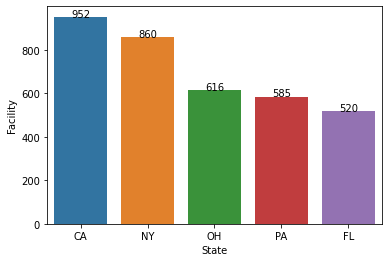

In [ ]:
q_top5 = """
    Select LST as State, count(CASEID) as Facility
    From df_2019
    Group by LST
    Order by Facility desc
    Limit 5
    """
top_5_states = ps.sqldf(q_top5, locals())
ax = sns.barplot(x='State', y='Facility', data=top_5_states)
for index, row in top_5_states.iterrows():
    ax.text(row.name,row.Facility, round(row.Facility,4), color='black', ha="center")


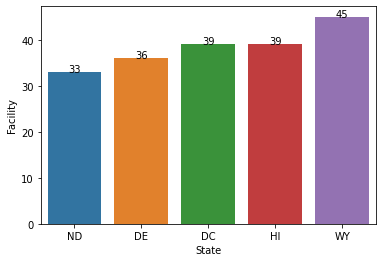

In [ ]:
q_bottom5 = """
    Select LST as State, count(CASEID) as Facility
    From df_2019
    Group by LST
    Order by Facility
    Limit 5 offset 1
    """
bottom_5_states = ps.sqldf(q_bottom5, locals())
ax = sns.barplot(x='State', y='Facility', data=bottom_5_states)
for index, row in bottom_5_states.iterrows():
    ax.text(row.name,row.Facility, round(row.Facility,4), color='black', ha="center")

**Category of mental health patients**

In [ ]:
import pandasql as ps
q1 = """
    Select
    sum(CHILDAD) as Children,
    sum(ADOLES) as Adolescent,
    sum(YOUNGADULTS) as Young_Adults,
    sum(ADULT) as Adults,
    sum(SENIORS) as Seniors
    From df_2019
    """
age_div_2019 = ps.sqldf(q1, locals())
print(age_div_2019)

   Children  Adolescent  Young_Adults  Adults  Seniors
0      7389        8101         10973   10488    10019


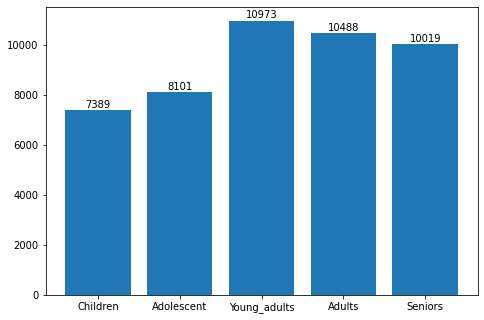

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Children', 'Adolescent', 'Young_adults', 'Adults', 'Seniors']
values = [7389,  8101, 10973, 10488, 10019]
ax.bar(labels, values)
for i, v in enumerate(values):
    ax.text(i, v+100, "%d" %v, ha="center")
plt.show()

**Mental health category**

In [ ]:
q2 = """
    Select LST as State, sum(ALZHDEMENTIA) as Alzeimers_Dementia
    From df_2019
    Group by State
    """
dementia = ps.sqldf(q2, locals())
print(dementia)

**Facilities that offer for treatment no charge or minimal payment($1)**

In [ ]:
q_no_charge = """
    Select LST as State, sum(REVCHK1) as Free_treatment
    From df_2019
    Group by State
    """
free_treatment = ps.sqldf(q_no_charge, locals())
print(free_treatment)

  State  Free_treatment
0    NY             663
1    CA             577
2    OH             559
3    PA             493
4    FL             429


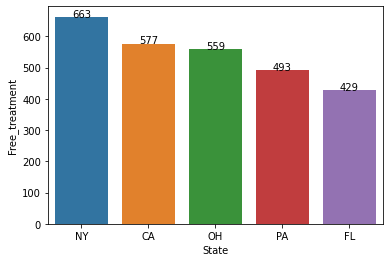

In [ ]:
q_no_charge_top5 = """
    Select LST as State, sum(REVCHK1) as Free_treatment
    From df_2019
    Group by State
    Order by Free_treatment desc
    Limit 5
    """
free_treatment_top5 = ps.sqldf(q_no_charge_top5, locals())
print(free_treatment_top5)
ax = sns.barplot(x='State', y='Free_treatment', data=free_treatment_top5)
for index, row in free_treatment_top5.iterrows():
    ax.text(row.name,row.Free_treatment, round(row.Free_treatment,4), color='black', ha="center")

**Grouped Bar plots for total number of facities vs facilities with free treatment in each state** 

In [ ]:
q_treatment_category = """
    Select state_facility.State, state_facility.Facility as Total_facility, free_treatment.Free_treatment 
    From state_facility
    Join free_treatment On state_facility.State = free_treatment.State
    Order by Free_treatment desc
    """
treatment_category = ps.sqldf(q_treatment_category, locals())
print(treatment_category)

   State  Total_facility  Free_treatment
0     NY             860             663
1     CA             952             577
2     OH             616             559
3     PA             585             493
4     FL             520             429
5     WI             429             397
6     IL             397             347
7     AZ             421             339
8     TX             384             336
9     MI             368             321
10    WA             398             321
11    MA             330             271
12    VA             291             269
13    IN             285             261
14    TN             298             255
15    NJ             313             251
16    MN             266             247
17    NC             297             232
18    UT             240             224
19    CT             230             210
20    GA             236             207
21    MD             282             205
22    KY             218             194
23    MO        

**States with free mental health facilities with free treatment**

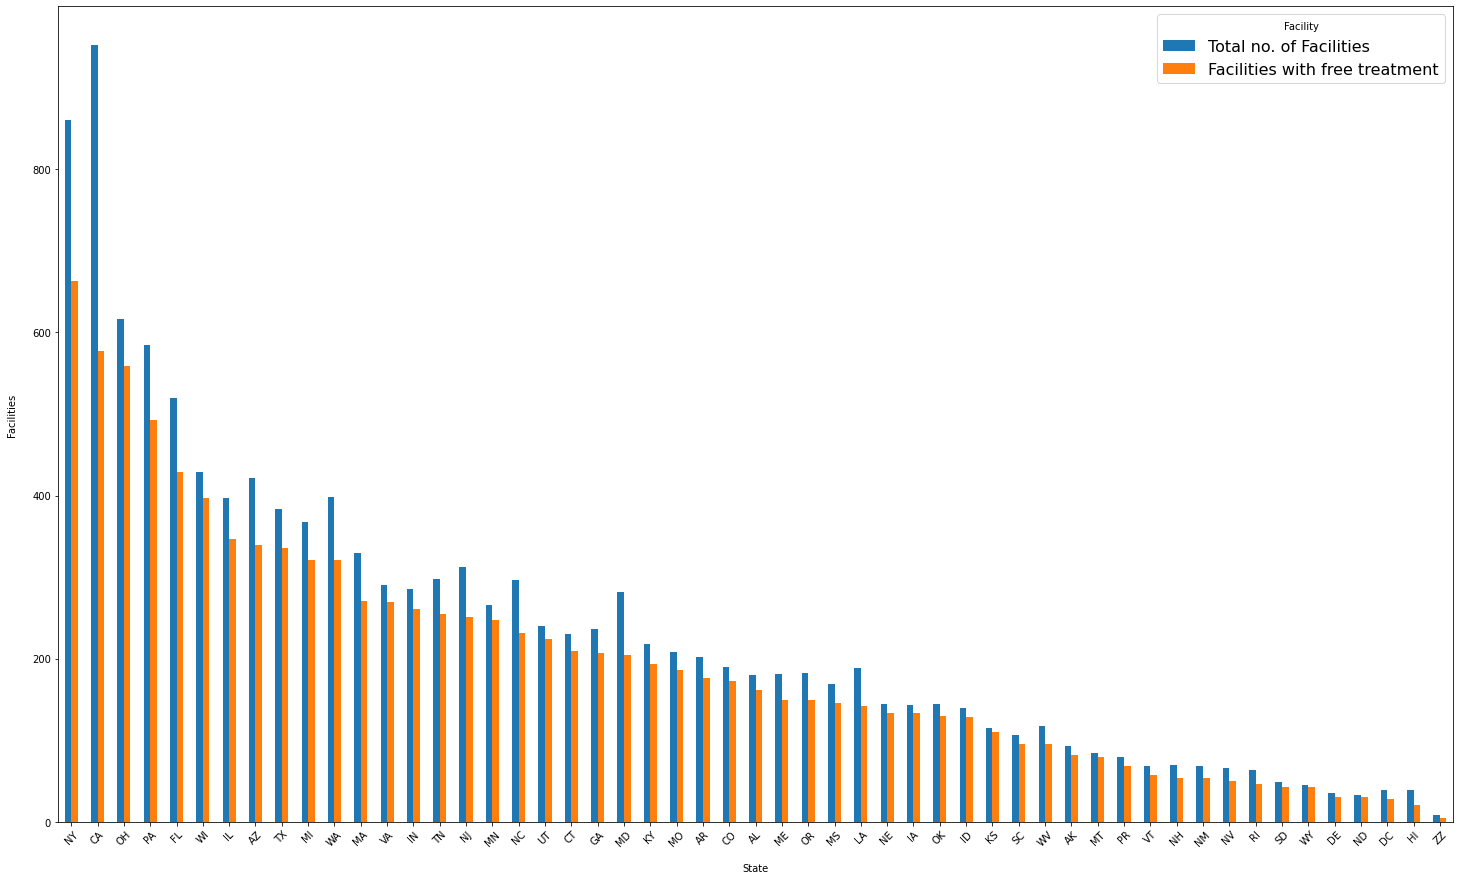

In [ ]:
treatment_category.set_index('State')[['Total_facility', 'Free_treatment']].plot(kind='bar', figsize=(25, 15))
plt.xticks(rotation=45)
plt.xlabel("State", labelpad=15)
plt.ylabel("Facilities", labelpad=15)
plt.legend(["Total no. of Facilities", "Facilities with free treatment"], fontsize=16, title="Facility")

**Demography of mental health patients**

In [ ]:
df_demography = pd.read_csv('/content/drive/My Drive/HiphE/Mental health/test.tsv', sep='\t')


   Id                                               Race  Patients
0   1                           White only, non-Hispanic    310750
1   2                           Black only, non-Hispanic     31423
2   3  American Indian or Alaskan Native only, Non-Hi...      6569
3   4                           Asian only, non-Hispanic      9179
4   5  Native Hawaiian or other Pacific Islander only...      2379
5   6                      Other race only, non-Hispanic      3219
6   7                          Multiracial, non-Hispanic      8404
7   8                                           Hispanic     37410
8   9                        Don't know/Not sure/Refused      8932




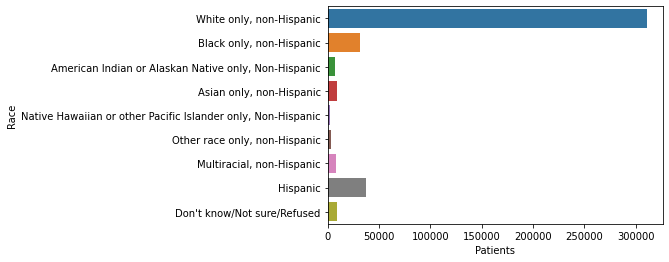

In [ ]:
q_demography = """
    Select Id, Race, count(Id) as Patients
    From df_demography
    Group by Race
    Order By Id
    Limit 9 Offset 1
    """
demography = ps.sqldf(q_demography, locals())
print(demography)
print()
print()
ax = sns.barplot(x='Patients', y='Race', data=demography)